In [20]:
#Note to self: Please see other version of Unit 2.4.4 (2 models) for a better explanation at how I arrived at this model

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns; sns.set();

In [21]:
df = pd.read_csv('C:\\Users\\ryan\\Desktop\\Thinkful DS Sample Data - Main Course\\Unit 2\\NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013.csv',
                 header = 4)

In [22]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0.0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,"2,577",3,0.0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,"2,846",3,0.0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,"97,956",791,8.0,NaN,30,227,526,"4,090",705,"3,243",142,NaN
4,Albion Village,"6,388",23,0.0,NaN,3,4,16,223,53,165,5,NaN


In [23]:
#Drop footnotes from dataset
df.drop(df.index[348:351], inplace = True)

In [24]:
#Remove commas from numbers, remove spaces before and after entries (if they exist)
for col in df.columns:
    df[col]= df[col].apply(lambda x: str(x).replace(',', ''))
    df[col]= df[col].apply(lambda x: str(x).strip())

#Convert str cols to float so we can do some graphing
numerical_columns = df.columns[1:]
for num_col in numerical_columns:
    df[num_col]= df[num_col].apply(lambda x: float(x))

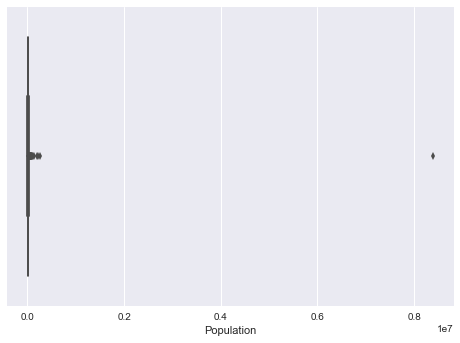

In [25]:

sns.boxplot(df.Population)
plt.show()

#Clearly there is an outlier datapoint for population (New York City) - but how do we handle. Drop from model? Scale down by 10X?
#Scale down by 100X?

In [26]:
#Find New York in the dataset:
nyc_index = df[df['City'] == 'New York'].index.tolist()

#New York is at index 216, so divide that row by 100 to 'normalize' the data 

for num_col in numerical_columns:
    df.ix[216:216, num_col] = df.ix[216:216 , num_col].divide(100)
    
#This took an embarrassing amount of time to figure out how to code correctly. Is there a better way?

df[df['City'] == 'New York']['Population']

216    83961.26
Name: Population, dtype: float64

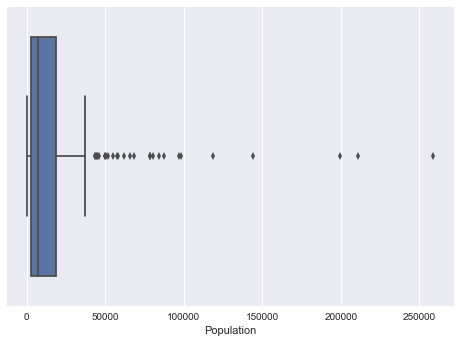

In [27]:
sns.boxplot(df.Population)
plt.show()

In [28]:
df['Robbery_Binary'] = df['Robbery'].apply(lambda x: 1 if x > 0 else 0)
df['Murder_Binary'] = df['Murder and\nnonnegligent\nmanslaughter'].apply(lambda x: 1 if x > 0 else 0)


In [29]:
#Fill NA's with zeros
df.fillna(0)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Robbery_Binary,Murder_Binary
0,Adams Village,1861.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0,0,0
1,Addison Town and Village,2577.0,3.0,0.0,0.0,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0,0,0
2,Akron Village,2846.0,3.0,0.0,0.0,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0,0,0
3,Albany,97956.0,791.0,8.0,0.0,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,0.0,1,1
4,Albion Village,6388.0,23.0,0.0,0.0,3.0,4.0,16.0,223.0,53.0,165.0,5.0,0.0,1,0
5,Alfred Village,4089.0,5.0,0.0,0.0,0.0,3.0,2.0,46.0,10.0,36.0,0.0,0.0,1,0
6,Allegany Village,1781.0,3.0,0.0,0.0,0.0,0.0,3.0,10.0,0.0,10.0,0.0,0.0,0,0
7,Amherst Town,118296.0,107.0,1.0,0.0,7.0,31.0,68.0,2118.0,204.0,1882.0,32.0,3.0,1,1
8,Amityville Village,9519.0,9.0,0.0,0.0,2.0,4.0,3.0,210.0,16.0,188.0,6.0,1.0,1,0
9,Amsterdam,18182.0,30.0,0.0,0.0,0.0,12.0,18.0,405.0,99.0,291.0,15.0,0.0,1,0


In [32]:
df2 = pd.DataFrame()
df2['City'] = df['City']
df2['Population'] = df['Population']
df2['Population_Sq'] = df['Population'] * df['Population']
df2['Robbery_Binary'] = df['Robbery_Binary']
df2['Robbery'] = df['Robbery']
df2['Murder_Binary'] = df['Murder_Binary']
df2['Murder'] = df['Murder and\nnonnegligent\nmanslaughter']
df2['Violent_Crime_PP'] = df['Violent\ncrime']/df['Population']
df2['Property Crime'] = df['Property\ncrime']
df2.head()

,City,Population,Population_Sq,Robbery_Binary,Robbery,Murder_Binary,Murder,Violent_Crime_PP,Property Crime
0,Adams Village,1861.0,3.463321e+06,0,0.0,0,0.0,0.000000,12.0
1,Addison Town and Village,2577.0,6.640929e+06,0,0.0,0,0.0,0.001164,24.0
2,Akron Village,2846.0,8.099716e+06,0,0.0,0,0.0,0.001054,16.0
3,Albany,97956.0,9.595378e+09,1,227.0,1,8.0,0.008075,4090.0
4,Albion Village,6388.0,4.080654e+07,1,4.0,0,0.0,0.003601,223.0


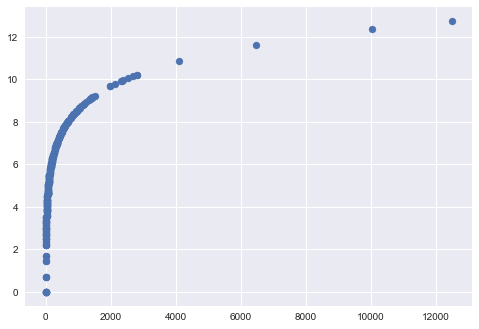

In [33]:
#Let's try a box-cox transform

#6 cities have 0 property crime - can't use zeros in box-cox transform
#Try adding a value of 1 to every city (ONLY IF IT HAS ZERO)  
df2['Property Crime V2'] = df2['Property Crime'].apply(lambda x: x+1 if x == 0 else x)

#133 cities have 0 robberies (so the log transform results in a value of -inf, which is not usable.)
#Try adding a value of 1 to every city  

df2['Robbery V2'] = df2['Robbery'] + 1
df2['Robbery_log'] = np.log(df2['Robbery V2'])

#Some cities have 0 murders (so the log transform results in a value of -inf, which is not usable.)
#Try adding a value of 1 to every city  
df2['Murder V2'] = df2['Murder'] + 1
df2['Murder_log'] = np.log(df2['Murder V2'])

#Some cities have 0 violent crimes (so the log transform results in a value of -inf, which is not usable.)
#Try adding a value of 1 to every city  
df2['Violent_Crime_PP V2'] = (df['Violent\ncrime'] + 1)/df['Population']
df2['VCPP_log'] = np.log(df2['Violent_Crime_PP V2'])

df2['Population_log'] = np.log(df2['Population'])


from scipy.stats import boxcox

bc = boxcox(df2['Property Crime V2'])

plt.scatter(df2['Property Crime V2'], bc[0])
plt.show()

df2['Property Crime BC Transform'] = bc[0]


In [34]:
print(len(df2))
#We kept all 348 datapoints by adding "1" to relevant columns

348


In [35]:
#Check for linearity w/ dependent var

#g = sns.PairGrid(df2)
#g = g.map_diag(plt.hist)
#g = g.map_offdiag(plt.scatter)               
#plt.show()

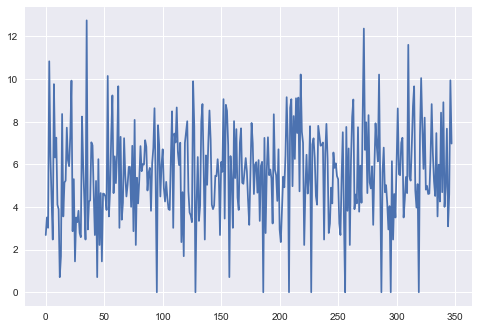

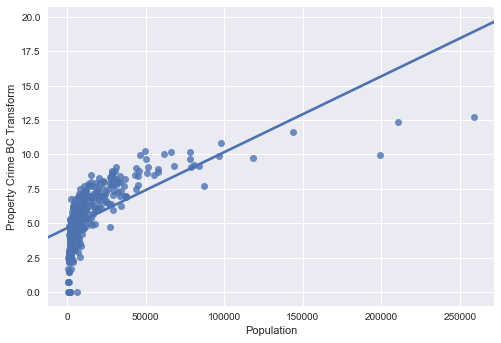

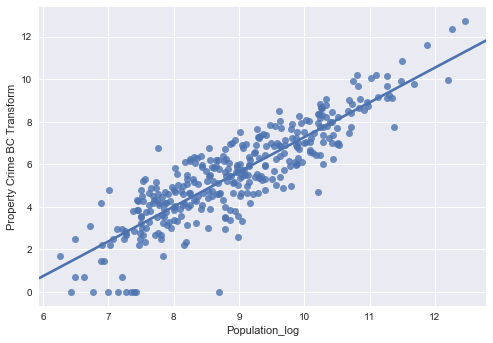

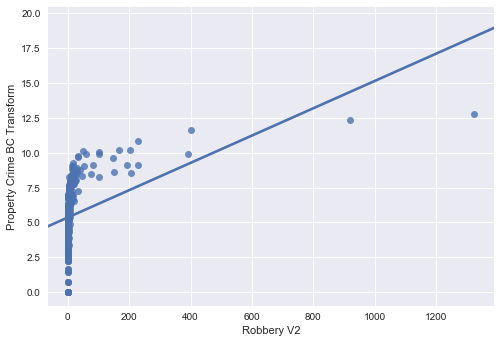

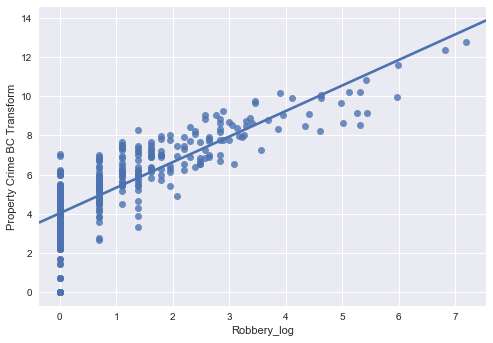

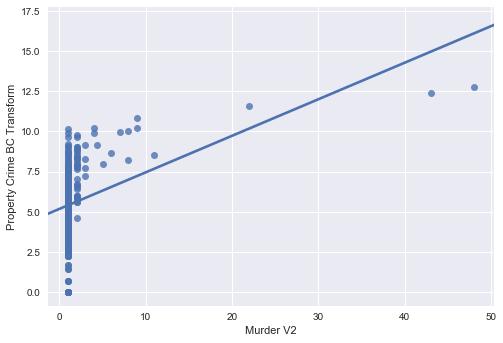

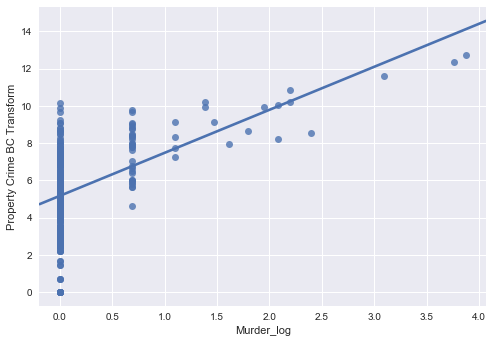

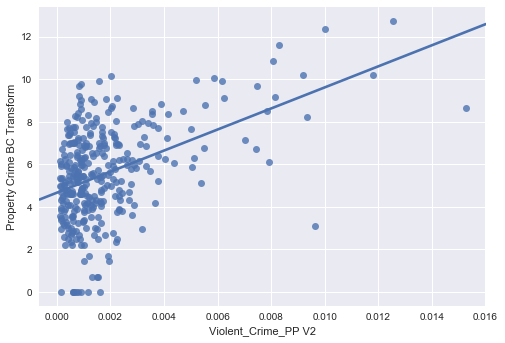

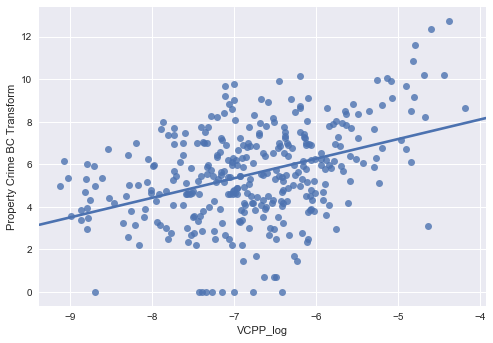

In [36]:
#test linearity between predictors & outcome...

#log for population and robbery seemed to be linearly related w/ dependent variable..but will need to drop -inf values later

plt.plot(df2['Property Crime BC Transform'])
plt.show()

sns.regplot(df2['Population'], df2['Property Crime BC Transform'], ci = False)
plt.show()

sns.regplot(df2['Population_log'], df2['Property Crime BC Transform'], ci = False)
plt.show()

sns.regplot(df2['Robbery V2'], df2['Property Crime BC Transform'], ci = False)
plt.show()

sns.regplot(df2['Robbery_log'], df2['Property Crime BC Transform'], ci = False)
plt.show()

sns.regplot(df2['Murder V2'], df2['Property Crime BC Transform'], ci = False)
plt.show()

sns.regplot(df2['Murder_log'], df2['Property Crime BC Transform'], ci = False)
plt.show()

sns.regplot(df2['Violent_Crime_PP V2'], df2['Property Crime BC Transform'], ci = False)
plt.show()

sns.regplot(df2['VCPP_log'], df2['Property Crime BC Transform'], ci = False)
plt.show()

In [80]:
#Population log and robbery log look to be pretty good predictors of the transformed dependent variable... let's try the model
#with these two (and maybe murder_log and violent crimes per person (not log version))

In [54]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

X = df2[['Population_log', 'Robbery_log', 'Murder_log', 'VCPP_log']]
Y = df2['Property Crime BC Transform']

regr.fit(X,Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [ 1.55859547  0.08910242 -0.34112655  0.70266523]

Intercept: 
 -3.67260350753

R-squared:
0.849691665211


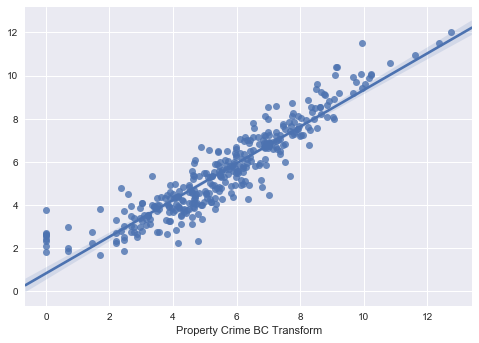

In [55]:
predicted = regr.predict(X).ravel()
actual = df2['Property Crime BC Transform']

residual = actual - predicted

sns.regplot(actual, predicted)
plt.show()

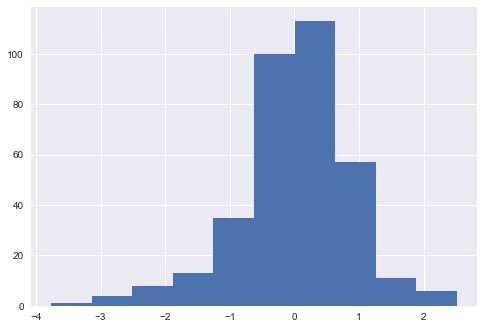

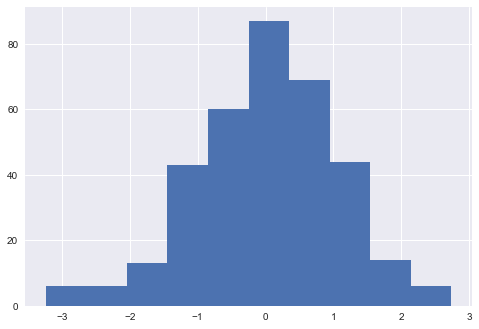

In [57]:
plt.hist(residual)
plt.show()

norm = np.random.normal(0,1,len(residual))
plt.hist(norm)
plt.show()

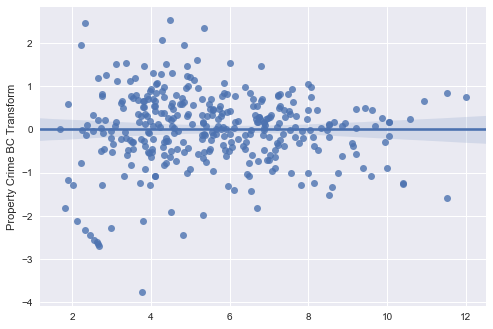

In [58]:
sns.regplot(predicted, residual, fit_reg = True)
plt.show()

In [ ]:
#Residuals do not demonstrate heteroscedasticity (no bias for a given range of predicted values)

c:\users\ryan\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


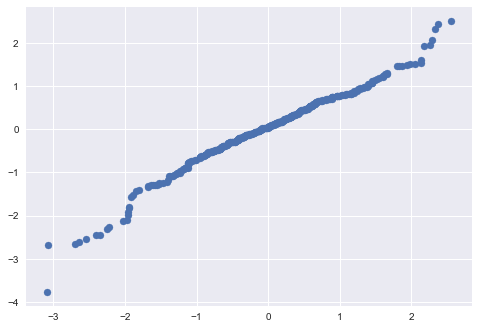

In [59]:
norm = np.random.normal(0,1,len(residual))
norm.sort()

residual.sort()
plt.scatter(norm, residual)
plt.show()

In [ ]:
#Residuals have a close-to-normal distribution